# Project: Swedish Municipality KPI Analysis
## Group Members:
### Nils Dunlop, e-mail: gusdunlni@student.gu.se
### Francisco Alejandro Erazo Piza, e-mail: guserafr@student.gu.se
### Chukwudumebi Ubogu, e-mail: gusuboch@student.gu.se

### Problem Description

* What is the purpose of your study?  

The primary objective of this study is to explore and analyze the impact of higher education on population health in Swedish municipalities. This investigation aims to uncover the nuances of how educational attainment influences various health outcomes and social behaviors within these communities.

Specifically, the study will delve into the following key aspects:
* **The relationship between educational attainment and obesity:** 
Investigating whether lower educational attainment is associated with higher rates of obesity. 
* **The relationship between educational attainment and daily smoking:** 
Investigating the correlation between education levels and smoking habits.
* **The relationship between educational attainment and risky drinking:** 
Analyzing the impact of educational attainment on alcohol consumption patterns.

The study aims to provide insights into the broader significance of educational inconsistencies on public health and social behaviors. The findings are expected to contribute to a deeper understanding of the role of education in shaping health outcomes and social dynamics within Swedish municipalities, potentially informing policy decisions and community health initiatives. 

* Are there errors in the dataset? How did you deal with them? Explain your process and the reasoning behind it. 

* What are the (statistical) data types of the columns in your dataset? 
In our dataset we have a mix of nominal categorical data (`kpi`, `muncipality` and `gender`) and numerical data (`period` and `value`).
1. `kpi` (Key Performance Indicator ID): This column contains alphanumeric codes corresponding to the KPIs analyzed within this dataset. These are nominal data as they are used to identify the KPIs and do not have any inherent order or numerical value.
2. `municipality`: This column contains the names of the municipalities included in the dataset. These are nominal data  as they represent labels or identifiers for different municipalities and do not hold any quantitative value.
3. `period`: This column represents the year and is numerical and is considered as categorical data as it categorizes the data into different years.
4. `gender`: This column contains values K, M and T representing if there is a gender division for the datapoint. K for women, M for men and T for both.
5. `value`: This column contains the values for the KPIs. These are numerical data as they represent the actual values for the KPIs.

* Use a Q-Q plot to compare the distributions of different groups. What you are trying to observe? Why is it is important? Describe the results.

In [6]:
# Importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the datasets
kpi_data_path = 'data/kpi_data.csv'
kpi_values_path = 'data/kpi_values.csv'
municipalities_data_path = 'data/municipalities_data.csv'

# Read the data
kpi_data = pd.read_csv(kpi_data_path)
kpi_values = pd.read_csv(kpi_values_path)
municipalities_data = pd.read_csv(municipalities_data_path)

# Displaying the first few rows of each dataset
kpi_data_head = kpi_data.head(15)
kpi_values_head = kpi_values.head(15)
municipalities_data_head = municipalities_data.head(15)

(kpi_data_head, kpi_values_head, municipalities_data_head)

(        id                                              title  \
 0   N00000  Personalkostnader som andel av verksamhetens k...   
 1   N00003                          Personalkostnader, kr/inv   
 2   N00005     Utjämningssystemet enl resultaträkning, kr/inv   
 3   N00009                   Intäkter kommunen totalt, kr/inv   
 4   N00011  Inkomstutjämning, bidrag/avgift, kr/inv. 1 nov...   
 5   N00012           Kostnadsutjämning, bidrag/avgift, kr/inv   
 6   N00014            Regleringsbidrag/avgift, kr/inv (2005-)   
 7   N00016                 Utjämningssystemet enl SCB, kr/inv   
 8   N00018                    Införandebidrag, kr/inv (2005-)   
 9   N00019                     Strukturbidrag, kr/inv (2005-)   
 10  N00021               Intäkter egentlig verksamhet, kr/inv   
 11  N00022  Kostnadsutjämningsnetto förskola och skolbarns...   
 12  N00023  Kostnadsutjämningsnetto grundskola, kr/inv 1 n...   
 13  N00024  Kostnadsutjämningsnetto äldreomsorg, kr/inv 1 ...   
 14  N0002

In [7]:
# List of KPI IDs for each category
regional_kpis = ['N00340', 'N00341', 'N00351', 'N00352', 'N00362', 'N00363']
obesity_kpis = ['U60510', 'U60511', 'U60512']
smoking_kpis = ['U60543', 'U60544', 'U60545']
risky_drinking_kpis = ['U60547', 'U60548', 'U60549']

# Filtering the kpi_values dataframe to create separate dataframes for each category
regional_df = kpi_values[kpi_values['kpi'].isin(regional_kpis)]
obesity_df = kpi_values[kpi_values['kpi'].isin(obesity_kpis)]
smoking_df = kpi_values[kpi_values['kpi'].isin(smoking_kpis)]
drinking_df = kpi_values[kpi_values['kpi'].isin(risky_drinking_kpis)]

# Filtering to include only rows where gender is 'T' (total)
obesity_df_total = obesity_df[obesity_df['gender'] == 'T']
smoking_df_total = smoking_df[smoking_df['gender'] == 'T']
drinking_df_total = drinking_df[drinking_df['gender'] == 'T']

# Display the first few rows of each filtered dataframe to verify
print(regional_df.head())
print(obesity_df_total.head())
print(smoking_df_total.head())
print(drinking_df_total.head())

         kpi  municipality  period gender      value
2962  N00340             0    2022      T  54.176671
2963  N00340             1    2022      T  73.856615
2964  N00340             3    2022      T  62.540901
2965  N00340             4    2022      T  28.396507
2966  N00340             5    2022      T  53.474125
           kpi  municipality  period gender  value
885673  U60510             1    2014      T   19.6
885676  U60510             3    2014      T   21.1
885679  U60510             4    2014      T   23.1
885682  U60510             5    2014      T   24.1
885685  U60510             6    2014      T   23.4
           kpi  municipality  period gender  value
891023  U60543             1    2014      T   24.2
891026  U60543             3    2014      T   19.8
891029  U60543             4    2014      T   24.9
891032  U60543             5    2014      T   23.5
891035  U60543             6    2014      T   19.2
           kpi  municipality  period gender  value
892311  U60547     

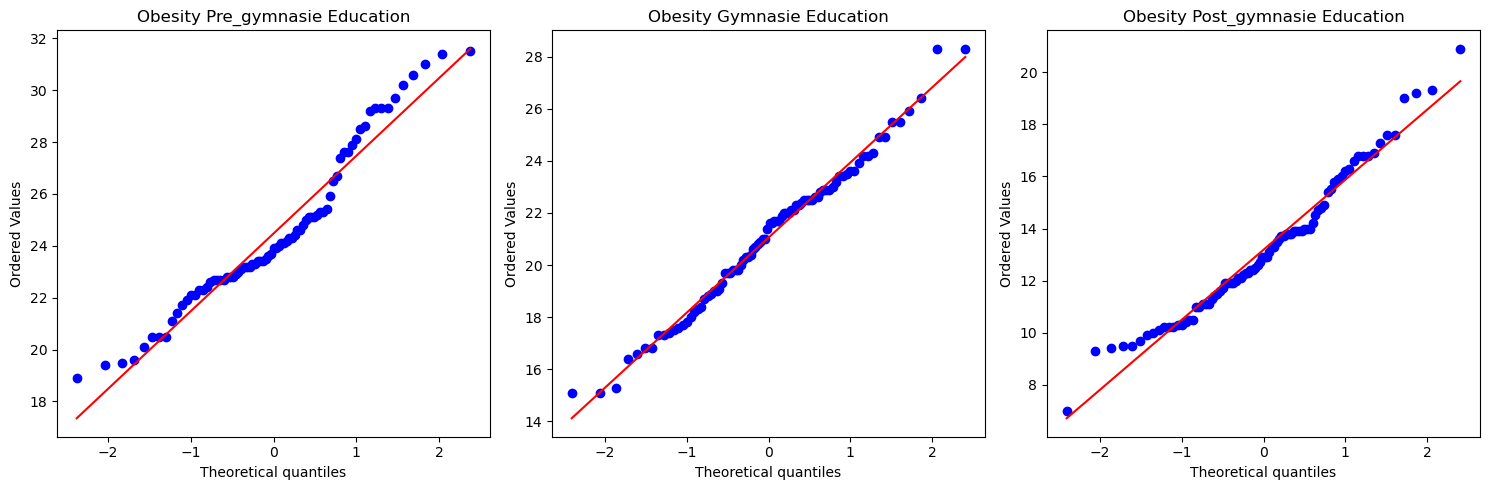

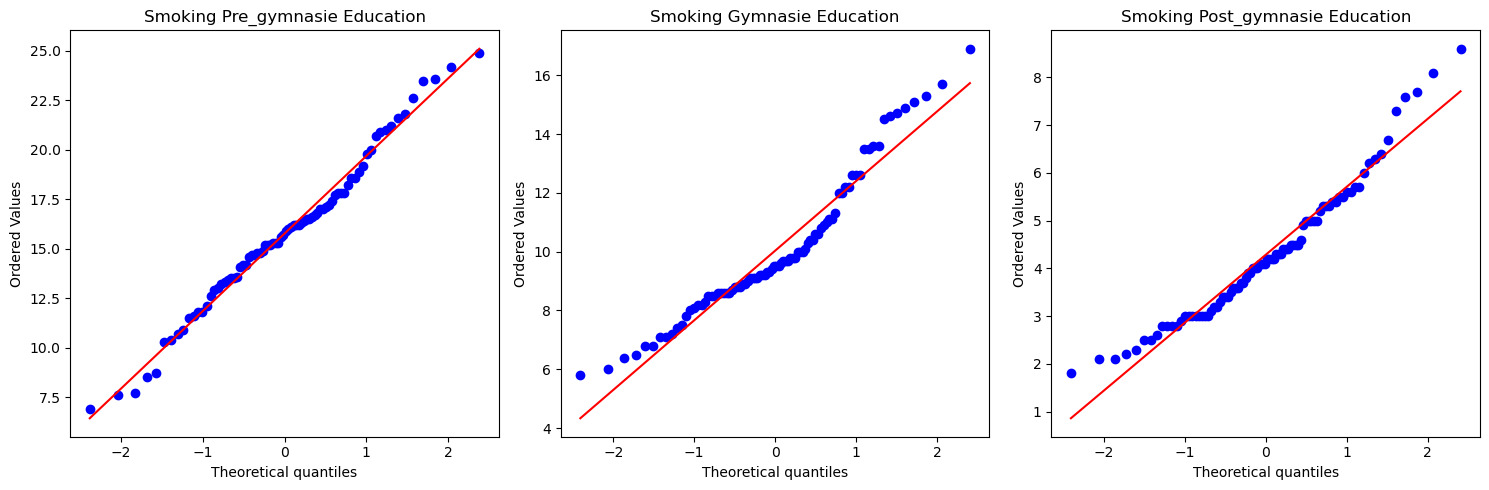

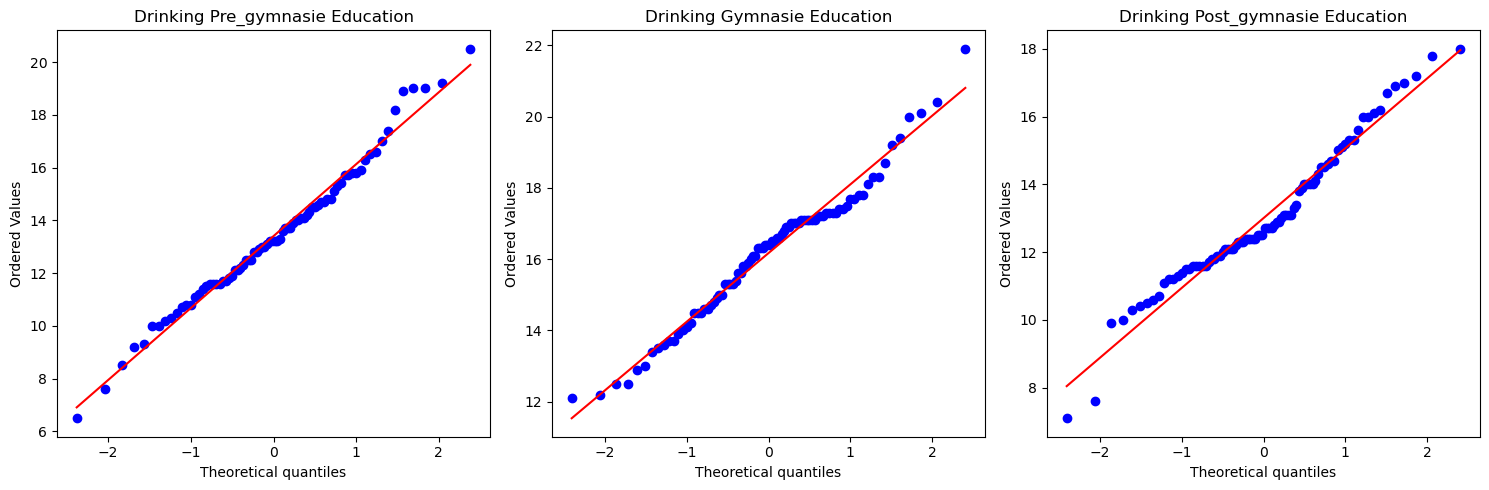

In [17]:
# Define the KPIs for each category
kpi_categories = {
    "obesity": ['U60510', 'U60511', 'U60512'],
    "smoking": ['U60543', 'U60544', 'U60545'],
    "drinking": ['U60547', 'U60548', 'U60549']
}

# Education levels for labeling
education_levels = ["pre_gymnasie", "gymnasie", "post_gymnasie"]

# Dictionary to store the dataframes
dataframes = {}

for category, kpis in kpi_categories.items():
    for i, kpi in enumerate(kpis):
        key = f"{category}_{education_levels[i]}_educ"
        dataframes[key] = kpi_values[(kpi_values['kpi'] == kpi) & (kpi_values['gender'] == 'T')]

# Create a function to generate Q-Q plots for a category
def create_qq_plots(category):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for i, level in enumerate(education_levels):
        key = f"{category}_{level}_educ"
        data = dataframes[key]['value']
        stats.probplot(data, dist="norm", plot=axs[i])
        axs[i].set_title(f'{category.capitalize()} {level.capitalize()} Education')

    plt.tight_layout()
    plt.show()

# Generate Q-Q plots for each category
create_qq_plots('obesity')
create_qq_plots('smoking')
create_qq_plots('drinking')

### Exploratory Data Analysis

* Show the histogram of some selected KPIs and describe your observation.
* Show the dependence of some selected variables and describe your observation.
* Describe the data using its range, sample mean, sample standard deviation and some quantiles. Describe your observation.
* Choose another visualization method to explore the data set.
* Draw conclusion from your exploratory analysis

### Probability Distribution

* Use probability distributions to describe some selected variables. State why they are interesting to look at and describe your observation.
* What are the parameters in the distribution? Estimate these parameters.
* Use hypothesis testing to show some interesting conclusions.

### Predictive Analysis

* Apply two predictive machine learning models to solve your problem. You can use anything from scikit learn or other libraries.
* Evaluate their performance. Which one do you prefer and why? Conduct hypothesis testing to answer this question.

### Conclusion

* State again your problem and the motivation.
* Draw a final conclusion.
* If you keep working on this project, what would be the next step?   

### References:
- Silhouette (clustering) (2023). Available at: https://en.wikipedia.org/wiki/Silhouette_%28clustering%29 (Accessed: 10 December 2023).